In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

RDKit WARNING: [14:28:19] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
# load your own set, and DrugBank :)
with open('../bojicm/compound/chembl395.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [14:28:27] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:28:27] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [14:28:27] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [14:28:27] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [14:28:27] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [14:28:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:28:27] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [14:28:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:28:27] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:28:27] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [14:28:27] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [14:28:27] Can't kek

RDKit ERROR: [14:28:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [14:28:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:28:28] ERROR: Could not sanitize molecule ending on line 623202
RDKit ERROR: [14:28:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [14:28:28] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [14:28:28] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [14:28:28] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [14:28:28] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:28] ERROR: Could not sanitize molecule ending on line 636938
RDKit ERROR: [14:28:28] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:28] Explicit valence for atom # 0 O, 3, i

In [3]:
# ECFP are done using RDKit pretty much the same way as MACCS in previous exercise
molecule = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
# 2 for radius, 1024 for hashed bit vector length
fp

In [4]:
fp.ToBitString() # write out the bit values in a string
# it is only ethanol, so only several bits are set

'000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [6]:
mtor_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in mtor_ligands]
# you do your ligand set :)
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [8]:
mtor_ligands_ecfp_sums = [0]*mtor_ligands_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in mtor_ligands_ecfp:
    for onbit in key.GetOnBits():
        mtor_ligands_ecfp_sums[onbit] += 1
mtor_ligands_ecfp_sums

[277,
 3725,
 819,
 1453,
 2494,
 524,
 444,
 775,
 882,
 515,
 861,
 1507,
 332,
 2120,
 1168,
 2954,
 443,
 50,
 133,
 616,
 337,
 742,
 737,
 727,
 460,
 2110,
 366,
 262,
 109,
 340,
 189,
 2023,
 398,
 15286,
 919,
 715,
 5849,
 239,
 428,
 406,
 307,
 1377,
 2157,
 301,
 123,
 1286,
 1696,
 189,
 280,
 408,
 529,
 215,
 467,
 1752,
 854,
 394,
 556,
 463,
 723,
 526,
 266,
 1007,
 431,
 1003,
 10831,
 595,
 234,
 651,
 425,
 741,
 134,
 456,
 739,
 3087,
 1323,
 776,
 207,
 837,
 328,
 1220,
 12597,
 322,
 316,
 348,
 1090,
 199,
 1081,
 314,
 355,
 578,
 4446,
 266,
 572,
 363,
 1927,
 360,
 457,
 722,
 167,
 500,
 311,
 449,
 2301,
 462,
 1189,
 539,
 370,
 613,
 295,
 286,
 642,
 469,
 1214,
 143,
 2182,
 313,
 1639,
 1319,
 662,
 2789,
 252,
 3432,
 412,
 539,
 511,
 655,
 391,
 244,
 8724,
 546,
 1558,
 903,
 394,
 1849,
 337,
 197,
 3740,
 166,
 3042,
 1509,
 2405,
 324,
 887,
 625,
 900,
 1416,
 260,
 3987,
 209,
 415,
 258,
 263,
 604,
 363,
 135,
 1066,
 185,
 1191,
 638

In [9]:
drugs_ecfp_sums = [0]*drugs_ecfp[0].GetNumBits() # a list of zeros of a given length
for key in drugs_ecfp:
    for onbit in key.GetOnBits():
        drugs_ecfp_sums[onbit] += 1
drugs_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 153,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 158,
 4264,
 155,
 111,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 78,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 76,
 345,
 179,
 388,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 169,
 152,
 122,
 313,
 87,
 270,
 124,
 107,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 395,
 608,
 349,
 767,
 78,
 767,
 118,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 198,
 99,
 2457,
 87,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 160,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 129,
 261,
 137,
 202,


In [10]:
mtor_ligands_ecfp_scaled = [x/len(mtor_ligands_ecfp) for x in mtor_ligands_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugs_ecfp_sums]
drugs_ecfp_scaled

[0.01687051876845213,
 0.3317868691128919,
 0.04006748207507381,
 0.044566287079994375,
 0.13201180936313792,
 0.03247574862927035,
 0.004077042035709265,
 0.01940109658371995,
 0.029945170814002532,
 0.04259805989034163,
 0.036552790664979615,
 0.036271615352172076,
 0.009559960635456208,
 0.09349079150850555,
 0.03191339800365528,
 0.1164065795023197,
 0.014480528609588077,
 0.014621116265991847,
 0.013074652045550401,
 0.026289891747504568,
 0.016589343455644594,
 0.028539294249964854,
 0.008857022353437369,
 0.03331927456769296,
 0.021509911429776464,
 0.022775200337410376,
 0.017854632363278503,
 0.01560522986081822,
 0.008716434697033601,
 0.029663995501194994,
 0.009700548291859975,
 0.024181076901448054,
 0.022212849711795303,
 0.5994657669056657,
 0.021791086742584002,
 0.01560522986081822,
 0.1512723182904541,
 0.010262898917475045,
 0.012231126107127795,
 0.029101644875579924,
 0.011106424855897652,
 0.06185856881765781,
 0.0911008013496415,
 0.015745817517221986,
 0.0109658

In [11]:
# compute the differences, store bit numbers prior to sorting
mtor_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(mtor_ligands_ecfp_scaled, drugs_ecfp_scaled))]
# let's sort the bits by the difference in MACCS incidence between our ligand set and the DrugBank database
mtor_drugbank_differences.sort(key=lambda x: x[1])
mtor_drugbank_differences[:3], mtor_drugbank_differences[-3:]

([(147, -0.1473317567147475),
  (1, -0.1467120939352698),
  (820, -0.10580808491972221)],
 [(333, 0.20848483073017757),
  (726, 0.23084694350301982),
  (875, 0.23655401863288317)])

So, there are some bits in the ECFP that are less common in HepG2 the set than in known drugs in Drugbank (the negative difference), and some that are much more common in the HepG2 set (the positive difference). For simplicity, we look just at the top 3 of each.

The most prevalent bit among HepG2 ligands compared to DrugBank molecules is bit number 875.

In [12]:
bitinfo = {} # dict to store infor about what bits were set by what atoms
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

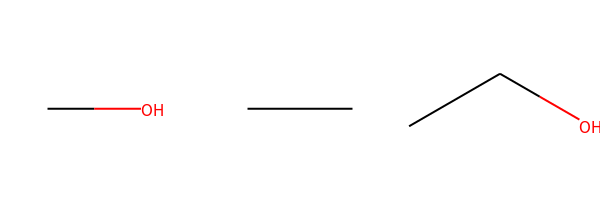

In [13]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: # radius 0 means just the atom, not useful as path
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

In [14]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    submols = [Chem.PathToSubmol(mol, hit_atoms) for atom, radius in bitinfo.get(bit, [])]
    return submols

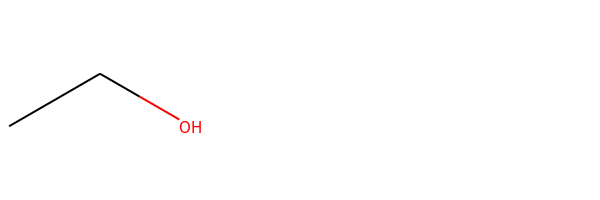

In [15]:
# test the func :)
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(ethanol, 386))

In [16]:
substructure_smiles = {}
for ligand in mtor_ligands:
    for submol in substructures_of_bit_ecfp4_1024(ligand, 875):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'O=[N+][O-]': 306,
 'ccN': 107,
 'CCO': 822,
 'CC=O': 871,
 'COc': 8324,
 'NC=S': 8,
 'ccO': 80,
 'CNc': 60,
 'ccC': 1353,
 'C#Cc': 76,
 'CNC': 705,
 'CCC': 2271,
 'NC=O': 768,
 'C[Se]c': 4,
 'Cc[nH]': 68,
 'CCc': 174,
 'C=CC': 548,
 'CC=N': 63,
 'cnC': 133,
 'cc=O': 550,
 'CCN': 602,
 'nc=O': 44,
 'COC': 651,
 'Ccn': 150,
 'cC=O': 116,
 'ccCl': 166,
 'ccc': 106,
 'N=cn': 10,
 'ccF': 112,
 'O=S=O': 104,
 'C=CCl': 14,
 'cC#N': 140,
 'CCn': 169,
 '[nH]c=O': 72,
 'O=CO': 179,
 'C=NN': 2,
 'CC#N': 63,
 'ncN': 58,
 'FCF': 53,
 'C=Cc': 203,
 'CON': 19,
 'oc=S': 12,
 'C[S+][O-]': 1,
 'N[SH]=O': 33,
 'C#CC': 30,
 'cCO': 15,
 'C[SH]=O': 44,
 'C[N+]C': 16,
 'N=CN': 15,
 'CNN': 2,
 'nc=S': 1,
 'CC[N+]': 8,
 'ccBr': 30,
 'COP': 1,
 'CNS': 2,
 'CSc': 7,
 'O=CS': 9,
 'C=NC': 1,
 'CC=C': 2,
 'cCN': 2,
 'C=CF': 4,
 'O=C[O-]': 5,
 'C[Si]C': 4,
 'CSC': 10,
 'Ccs': 5,
 'CCCl': 2,
 'ncO': 1,
 'cCCl': 2,
 'ClCCl': 2,
 'CCS': 3,
 'ncCl': 1,
 'C=NO': 8,
 'Cnn': 2,
 'ccI': 2,
 'ccn': 2,
 'N=co': 2,
 'O=co': 

In [17]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 875):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'N=CN': 39,
 'ccc': 744,
 'C=CN': 9,
 'cnc': 52,
 'C=O.CS': 1,
 'cO.cO': 6,
 'CC.CC': 24,
 'CCC': 194,
 'cCl.cCl': 61,
 'CO.cO': 43,
 'cF.cF': 15,
 'O=S=O': 70,
 'COC': 104,
 'cOC': 75,
 'c[SH]=O': 4,
 'CO.cF': 9,
 'cF.cO': 4,
 'CO.cCl': 17,
 'CCl.cCl': 2,
 'c=O.c[nH]': 2,
 'cCl.ns': 2,
 'cI.cI': 19,
 'FCF': 37,
 'csc': 19,
 'O=CO': 103,
 'CO.CO': 10,
 'O=S.cCl': 28,
 'cCl.cF': 12,
 'C=O.cO': 27,
 'cCl.cO': 12,
 'CNC': 84,
 'C=Nc': 2,
 'C[SH]=O': 4,
 'C=O.cCl': 12,
 'ccN': 44,
 'cCl.co': 2,
 'CC.CN': 6,
 'C=N.cN': 1,
 'c=O.cF': 10,
 'cSc': 13,
 'CF.cCl': 4,
 'c-n.cCl': 3,
 'cOc': 16,
 'cCl.cS': 6,
 'COc': 115,
 'C=O.co': 2,
 'ccO': 95,
 'cCC': 15,
 'CS.cCl': 2,
 'ccCl': 85,
 'CC=O': 58,
 'cSC': 5,
 'C=S.cO': 2,
 'c=O.c=S': 1,
 'CN.cc': 3,
 'O=[SH][O-]': 14,
 'cNC': 6,
 'ccC': 148,
 'C=CC': 19,
 'CN.cCl': 7,
 'C=S.cn': 1,
 'C=O.CN': 3,
 'C=O.CO': 10,
 'C=O.C=O': 10,
 'c=O.cCl': 4,
 'CC.cc': 34,
 'ccn': 62,
 'CN.cO': 6,
 'CO.cBr': 3,
 'coc': 20,
 'cF.no': 5,
 'CI.cCl': 2,
 'ccS': 17,
 '